#                                                       Text Mining

#### We will analyze from data retrieved on Twitter through its Streaming API what is the most used buzzword in computer science currently on Twitter. <br>[ Data science, Machine learning, Deep Learning, Artificial Intelligence, Blockchain ]

Getting the data twitter : twitter_streaming.py

In this notebook we are going to read the data try to achieve our main goal.
We will do it by following this steps :
+ *Store our tweet in JSON format*
+ *Retrieve the text content of our tweet*
+ *Use DataFrame to manipulate our data*
+ *Visualize data*

In [1]:
# Import libraries

import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [21]:
# Function used to search a keyword in one tweet

def is_in(keyword, tweet):
    keyword = keyword.lower()
    tweet = tweet.lower()
    match = re.search(keyword, tweet)
    if match:
        return True
    return False

# Formatting 
def nice_format(pct, allvals):
    return "{:.1f} %".format(pct)

In [3]:
# Read file

tweets_data_path = 'dataset/datas.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "r")

In [4]:
# Retrieve data and push it in tweets_data

for tweet in tweets_file:
    try:
        tweets_data.append(json.loads(tweet))
    except:
        continue
        

In [5]:
# In one tweet we can find many informations linked to this tweet such as id, text, geo, entities ...

#print(tweets_data[0].keys())


In [23]:
# We are going to retrieve the text 

number_tweet = len(tweets_data)

tweets_text = []

for i in range(number_tweet):

    tweets_text.append(tweets_data[i]["text"])
          
    pass
    

In [45]:
# Create list

data_science = []
machine_learning = []
deep_learning = []
ai = []
blockchain = []

In [46]:
# Fill out our list

for i in range(number_tweet):
    
    data_science.append(is_in('data science',tweets_text[i]) or is_in('datascience',tweets_text[i]))
    
    machine_learning.append(is_in('machine learning',tweets_text[i]) or is_in('machinelearning',tweets_text[i]))
    
    deep_learning.append(is_in('deep learning',tweets_text[i]) or is_in('deeplearning',tweets_text[i]))
    
    ai.append(is_in('artificial intelligence',tweets_text[i]) or is_in('artificialintelligence',tweets_text[i]))
    
    blockchain.append(is_in('blockchain',tweets_text[i]))

In [47]:
# We are going to use DataFrame for alyzing data so we have to create a dict

items = ["data science", "machine learning", "deep learning", "ai", "blockchain"]

values = [data_science,machine_learning,deep_learning,ai,blockchain]


data = dict(zip(items,values))


tweet = pd.DataFrame(data)


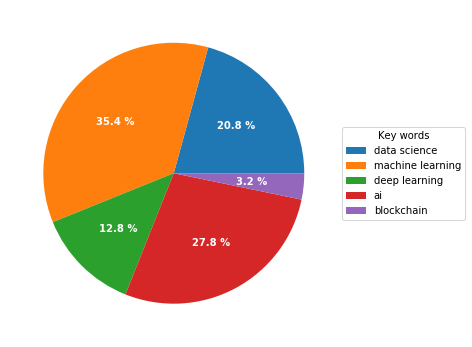

In [48]:
# Graph


tweets_by_prg_lang = [    
                          tweet['data science'].value_counts()[True], 
                          tweet['machine learning'].value_counts()[True], 
                          tweet['deep learning'].value_counts()[True],
                          tweet['ai'].value_counts()[True],
                          tweet['blockchain'].value_counts()[True],                   
                     ]

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))


wedges, texts, autotexts = ax.pie(tweets_by_prg_lang, autopct=lambda pct: nice_format(pct, tweets_by_prg_lang),
                                  textprops=dict(color="w"))

ax.legend(wedges, items,
          title="Key words",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("")

plt.show()


In [41]:
# Apply filter to check if our dataset is coherent

mask = (tweet["data science"] == 0) & (tweet["machine learning"] == 0) & (tweet["deep learning"] == 0) & (tweet["ai"] == 0) & (tweet["blockchain"] == 0)

tweet[mask].head()

#print(len(tweet[mask]))

,data science,machine learning,deep learning,ai,blockchain
0,False,False,False,False,False
3,False,False,False,False,False
5,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False


In [44]:
# We have 18.925 lines in our dataframe that hold no relevant informations.
# We will add a new parameter : extended_tweet

#  text and extended_tweet

tweets_text = []

for i in range(number_tweet):
    
    try:        
        tweets_text.append(tweets_data[i]["extended_tweet"]["full_text"]) #Modif
    except:
        tweets_text.append(tweets_data[i]["text"])
          
    pass


# Run this cell and go to cell ** Create List ** run it and cells below to see the modifications